In [14]:
# Chapter17
import pylab
import random

In [13]:
def variance(X):
    """Xを数のリストとする。
       Xの分散を返す"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    """を数のリストとする。
       Xの標準偏差を返す。"""
    return variance(X)**0.5

In [14]:
# 17.2
def getBMData(filename):
    """与えられたファイルの内容を読み込む、
       ファイルは次の6要素がカンマで区切られた形式
       0. 氏名(string), 1. 性別(string), 2. 年齢(int), 3. 区分(走/車いす),4. 出身国(string),5. 総合タイム(float)
       返り値: それぞれが6変数のリストのdict(辞書)"""
    data = {}
    f = open(filename)
    line = f.readline()
    data['name'],data['gender'],data['age'] = [],[],[] # 辞書要素をリストで初期化
    data['division'],data['country'],data['time'] = [],[],[]
    while line != '': # 最終行まで読み込む
        split = line.split(',') # カンマで区切りリストで返す
        data['name'].append(split[0])
        data['gender'].append(split[1])
        data['age'].append(split[2])
        data['division'].append(split[3])
        data['country'].append(split[4])
        data['time'].append(float(split[5][:-1])) # 改行\nを取り除く
        line = f.readline()
    f.close()
    return data

In [15]:
def makeHist(data,bins,title,xLabel,yLabel):
    pylab.hist(data,bins)
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    mean = sum(data)/len(data)
    # print(mean)
    std = stdDev(data)
    pylab.annotate('Mean =' + str(round(mean,2)) + '\nSD =' + str(round(std,2)),\
                    fontsize = 12,xy = (0.65,0.75),xycoords = 'axes fraction')

In [18]:
times = getBMData('bm_results2012.txt')['time']

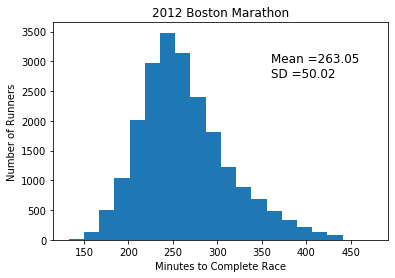

In [19]:
makeHist(times,20,'2012 Boston Marathon', 'Minutes to Complete Race', 'Number of Runners')

#### データの可視化
- フィニッシュタイムの分布
- 右に裾が広がっている。⇒正規分布ではない

In [22]:
# 17.3　フィニッシュタイムの抽出とヒストグラム
def sampleTimes(times, numExamples):
    """times: float型のリスト
       numExamples: int型の取り出す数
       平均・標準偏差とともに分布を描画する"""
    sample = random.sample(times, numExamples)
    makeHist(sample, 10, 'Sample of Size' + str(numExamples),
                'Minutes to Conplete Race','Number of race')

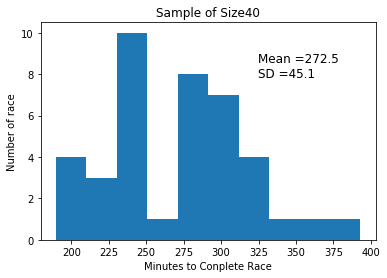

In [23]:
sampleSize = 40
sampleTimes(times,sampleSize)

#### memo
- 分布は正規分布からかなりかけ離れている。⇒ 標本サイズが小さいから。
- 驚く点は、標本サイズが小さいのに(21000データ中の40)推定された平均値・標準偏差の差が小さい(約2%未満)
- 推定がどのくらい信頼できるのものか定量的に表せないか。。。

In [28]:
# 17.4 平均推定における分散の影響
import scipy.integrate

def gaussian(x,mu,sigma):
    factor1 = (1/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1 * factor2

area = round(scipy.integrate.quad(gaussian,-3,3,(0,1))[0],4)
print('Probability of being within 3',
        'of true mean of tight dist. =',area)
area = round(scipy.integrate.quad(gaussian,-3,3,(0,100))[0],4)
print('Probability of being within 3',
        'of true mean of wide dist. =',area)

Probability of being within 3 of true mean of tight dist. = 0.9973
Probability of being within 3 of true mean of wide dist. = 0.0239


In [32]:
def testSamples(numTrials, sampleSize):
    tightMeans, wideMeans = [],[]
    for t in range(numTrials):
        sampleTight, sampleWide = [],[]
        for i in range(sampleSize):
            sampleTight.append(random.gauss(0,1))   # random.gauss(mu,sigma)
            sampleWide.append(random.gauss(0,100))
        tightMeans.append(sum(sampleTight)/len(sampleTight))
        wideMeans.append(sum(sampleWide)/len(sampleWide))
    return tightMeans, wideMeans

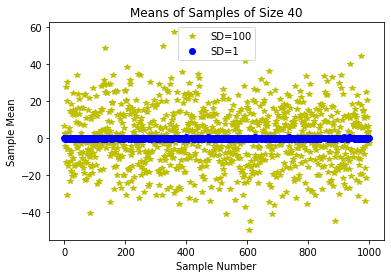

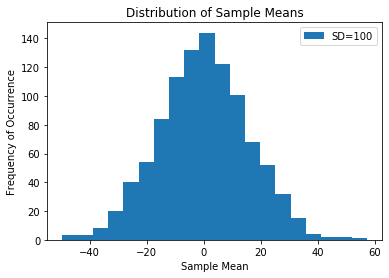

In [33]:
tightMeans, wideMeans = testSamples(1000,40) # 標本サイズ40を1000回取出す試行
pylab.plot(wideMeans, 'y*',label = 'SD=100')
pylab.plot(tightMeans,'bo',label = 'SD=1')
pylab.xlabel('Sample Number')
pylab.ylabel('Sample Mean')
pylab.title('Means of Samples of Size ' + str(40))
pylab.legend()

pylab.figure()
pylab.hist(wideMeans, bins=20, label='SD=100')
pylab.title('Distribution of Sample Means')
pylab.xlabel('Sample Mean')
pylab.ylabel('Frequency of Occurrence')
pylab.legend()

- 上図:2つの母集団から取った標本サイズ40の標本各1000個の平均をプロット
- 下図:標準偏差が100の場合のヒストグラム
    - 平均が0付近を中心とする正規分布に似ている⇒_中心極限定理_

In [5]:
import random
import pylab
from statistics import variance

Mean of rolling 1 die = 2.4938 Valiance = 2.0993
Mean of rolling 100 dice = 2.4979 Variance = 0.021


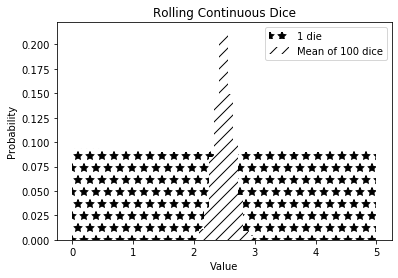

In [10]:
# 17.2
def plotMeans(numDicePerTrial, numDiceThrown, numBins, legend, color, style):

    means = []
    numTrials = numDiceThrown//numDicePerTrial
    for i in range(numTrials):
        vals = 0
        for j in range(numDicePerTrial):
            vals += 5*random.random()   # 0 ~ 5がランダムに出る
        means.append(vals/numDicePerTrial)
    pylab.hist(means, numBins, color=color, label=legend,
                weights = pylab.array(len(means)*[1])/len(means),hatch = style)
    return sum(means)/len(means), variance(means)

mean, var = plotMeans(1, 100000, 11, '1 die', 'w', '*')
print('Mean of rolling 1 die =', round(mean,4),
        'Valiance =', round(var,4))

mean, var = plotMeans(100,100000,11, 'Mean of 100 dice', 'w','//')
print('Mean of rolling 100 dice =', round(mean, 4),'Variance =', round(var,4))
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

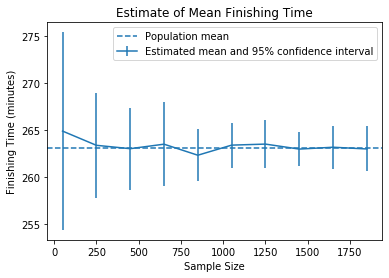

In [22]:
# 17.7 エラーバー(誤差線)とプロットを生成する
times = getBMData('bm_results2012.txt')['time']
meanOfMeans, stdOfMeans = [],[]
sampleSizes = range(50, 2000, 200)
for sampleSize in sampleSizes:
    sampleMeans = []
    for t in range(20):
        sample = random.sample(times, sampleSize) # timesの中からsampleSize個無作為抽出する。
        sampleMeans.append(sum(sample)/sampleSize) # 標本20個の平均をリストに格納
    meanOfMeans.append(sum(sampleMeans)/len(sampleMeans))
    stdOfMeans.append(stdDev(sampleMeans))
pylab.errorbar(sampleSizes, meanOfMeans,yerr=1.96*pylab.array(stdOfMeans),label='Estimated mean and 95% confidence interval')
pylab.axhline(sum(times)/len(times), linestyle='--', label='Population mean')
pylab.title('Estimate of Mean Finishing Time')
pylab.xlabel('Sample Size')
pylab.ylabel('Finishing Time (minutes)')
pylab.legend(loc='best')

#### memo
- 中心極限定理により標本平均は正規分布に従う。
- 標準偏差と経験則を使用して各標本サイズの95%信頼区間を算出可能。
- 信頼区間が単調に減少している。50～1850まで標本サイズが大きくなるにつれて大きく減少している。⇒これが重要。

標本サイズnの標本の標準誤差は、同じ母集団から無限回、標本サイズnの標本の平均を取った時の標準偏差である。
それはnとσ(母集団の標準偏差)両方に依存し、次のようになる。
Standard Error = σ / n^0.5

Text(0.5, 1.0, 'Sample SD vs Population SD')

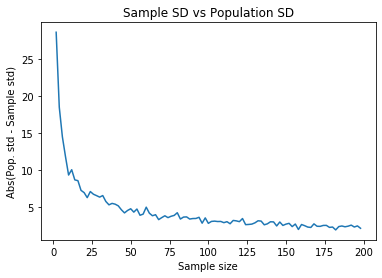

In [29]:
# 17.3 平均の標準誤差
# 1850 * 20 = 37000の標本があって95%信頼区間-4分誤差。⇒実際の競技者より多い。
# あまり有用ではない。母集団全体を使用して実際の平均を直接計算することから離れるべき。
# ⇒ 単一の標本を使い信頼区間を推定する方法が必要。
# 17.8
times = getBMData('bm_results2012.txt')['time']
popStd = stdDev(times)
sampleSizes = range(2, 200, 2)
diffsMeans = []
for sampleSize in sampleSizes:
    diffs = []
    for t in range(100):
        diffs.append(abs(popStd - stdDev(random.sample(times, sampleSize))))
    diffsMeans.append(sum(diffs)/len(diffs))
pylab.plot(sampleSizes, diffsMeans)
pylab.xlabel('Sample size')
pylab.ylabel('Abs(Pop. std - Sample std)')
pylab.title('Sample SD vs Population SD')


標本サイズが十分であり、母集団の分布が正規分布からかけ離れていなければ、経験則に基づきこの推定値を信頼区間の計算に使ってよい。
これが意味していることは、例えば200人の競技者の単一の標本を使って次のことができる（元データは20000人）
- その標本の平均と標準偏差を計算する。
- その標本の標準偏差を使い標準誤差を推定する。そして
- 推定した標準誤差を使い標本平均の信頼区間を導く
以下は、これを10000回行い、母平均から標準誤差が1.96以上となる標本平均の数を割った率を出力する。(正規分布において、標準偏差の95%のデータが平均の標準偏差の1.96以内に収まることから)

In [30]:
# 17.9
times = getBMData('bm_results2012.txt')['time']
popMean = sum(times)/len(times)
sampleSize = 200
numBad = 0
for t in range(10000):
    sample = random.sample(times,sampleSize)
    sampleMeans = sum(sample)/sampleSize
    se = stdDev(sample)/sampleSize**0.5
    if abs(popMean - sampleMeans) > 1.96*se:
        numBad += 1
print('Fraction outside 95% confidence interval =', numBad/10000)

Fraction outside 95% confidence interval = 0.0495
